### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Code starts here
df =pd.read_csv("./train.csv")
df.head(5)

X=df[['ages','num_reviews','piece_count','play_star_rating','review_difficulty','star_rating','theme_name','val_star_rating','country']] 
y=df['list_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Code ends here.

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

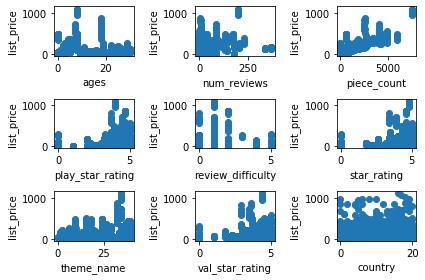

In [3]:
# Code starts here
cols = X_train.columns.values

fig ,axes = plt.subplots(nrows = 3 , ncols = 3)

for i in range(3):
    for j in range(3):
        col = cols[i*3 + j]
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel(y_train.name)
plt.tight_layout()

plt.show()  










# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

### Model building

In [5]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('rmse: ',rmse)
r2 = r2_score(y_test,y_pred)
print("r2: ",r2)

print(y_pred)

# Code ends here.

rmse:  41.57029390196533
r2:  0.7699605762362522
[38.55670643 24.17167269 28.50037449 ... 46.89913969 52.95275912
 50.73759715]


### Residual check!

- Check the distribution of the residual.

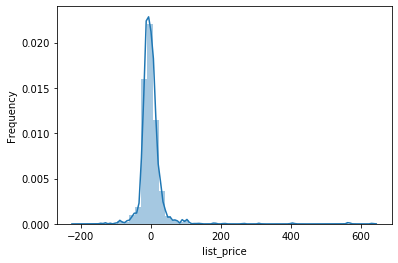

In [16]:
# Code starts here
residual = y_test - y_pred
sns.distplot(residual)
plt.ylabel("Frequency")
plt.show()

# Code ends here.

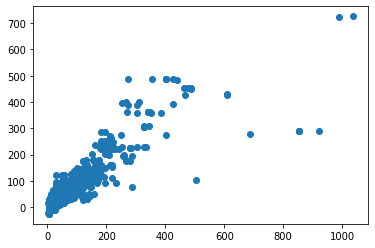

In [18]:
plt.scatter(y_test, y_pred)
plt.show()

In [19]:
print(test.shape)
y_pred.shape

(3679, 9)


(1717,)

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [20]:
test = pd.read_csv('test.csv')
test.columns

Index(['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country', 'Id'],
      dtype='object')

In [21]:
Id =test['Id']
print(Id)

0        9907
1        5243
2        8276
3        6501
4        1619
        ...  
3674     2144
3675     7242
3676    11631
3677     4639
3678     7269
Name: Id, Length: 3679, dtype: int64


In [22]:
test.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [23]:
test.drop('Id',1,inplace=True)

In [24]:
# fitting model 
pred = regressor.predict(test)

In [26]:
submission_file1 = pd.DataFrame({'Id' : Id, 'list_price' : pred})
submission_file1.to_csv('submission1.csv', index = False)